coding: utf-8<br>
coding: utf-8


<br>
TL;DR Nearest Neighbors, Synthetic Dataset, Euclidean Distance.<br>
Task: <br>
    1. Implement a k-nearest neighbors (KNN) classifier for two classes with a configurable number of neighbors. <br>
    2. Implement the accuracy metric and one other metric of your choice.<br>
    3. Visualize the results.<br>
Grading Criteria:<br>
    The maximum score is 10 points. Your grade will equal the total points earned.<br>
    <br>
    * For KNN implementation: up to 4 points.<br>
        - 3 points are awarded if your code works (passes the corresponding assert).<br>
        - A fourth point is awarded if you use internal numpy functions for implementation.<br>
        - Bonus: An additional point is available (not included in the main 10) for a unique approach in the fit method. See comments in the fit method for details.<br>
    * For accuracy and an additional metric: 1 point each, awarded for passing the asserts.<br>
    * For Matplotlib plots: 1 point for each well-crafted plot. This includes clear points (not overly crowded), readable labels, a plot title, legend, and labeled axes. Partial credit (0.5 points) is given if the plot contains the required data but lacks readability.<br>
    * Significant non-compliance with PEP8: -1 point.<br>
Important: make sure, that your code does not raise any error; otherwise I won't check your asset.<br>
Recommendation:<br>
    Start by examining the code from the `if __name__ == "__main__"` section, then proceed to the accuracy function and the KNN class.<br>


In [54]:
import numpy as np
from typing import SupportsIndex
from sklearn.metrics import classification_report, accuracy_score
from collections import Counter
from sklearn.metrics import confusion_matrix

In [55]:
class KNN:
    """
    Class implementing the k-nearest neighbors algorithm.
    """
    def __init__(self, n_neighbors: int = 4):
        # Training data: features
        self.X_train = None

        # Training data: class labels
        self.y_train = None

        # Number of nearest neighbors
        self.n_neighbors = n_neighbors
    def fit(self, X: np.ndarray, y: SupportsIndex):
        """
        Fits the KNN model to the training data. 
        In KNN, "fitting" simply involves storing the training dataset.        
        """
        self.X_train = X
        self.y_train = y
        # For the first try, just store the training set in the object's attributes.
        ...
        #  This is fine as is, but real-world implementations use more efficient data structures.
        #  If you implement something innovative, you may earn a bonus point. Note, that the 
        #  external libraries are prohibited.
        pass
    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Predicts labels for a set of input samples.
        """
        # Step 1: Compute the pairwise Euclidean distances
        distances = np.sqrt(
            np.sum((X[:, np.newaxis, :] - self.X_train[np.newaxis, :, :]) ** 2, axis=2)
        )
    
        # Step 2: Get the indices of the k-nearest neighbors
        nearest_indices = np.argsort(distances, axis=1)[:, :self.n_neighbors]
    
        # Step 3: Retrieve the labels of the nearest neighbors
        nearest_labels = self.y_train[nearest_indices].astype(int)
    
        # Step 4: Perform majority voting in a fully vectorized way
        num_classes = int(self.y_train.max() + 1)
    
        # Create a bincount matrix where rows correspond to test samples and columns to classes
        bincounts = np.zeros((nearest_labels.shape[0], num_classes), dtype=int)
    
        # Use advanced indexing to count occurrences
        row_indices = np.repeat(np.arange(nearest_labels.shape[0]), self.n_neighbors)
        bincounts[row_indices, nearest_labels.ravel()] += 1
    
        # Find the most frequent label
        predictions = np.argmax(bincounts, axis=1)
    
        return predictions
        
        # TODO: 1) Compute the Euclidean distance between each sample in X and each sample in self.X_train. 
        # TODO: 2) For each sample in X, find the self.n_neighbors closest samples in self.X_train and aggregate their labels.

        # Exercise: Consider the asymptotic complexity of this function. How does it depend on the feature space dimension?

        # Fully vectorized solution: 4 points. Other working solutions: 3 points.
        

In [56]:
def accuracy(labels_true: np.ndarray, labels_pred: np.ndarray) -> float:
    """
    Computes the fraction of correctly predicted labels. 
    This is a simple yet imperfect measure of classification performance.
    """
    accuracy = 1 - np.sum(abs(labels_true - labels_pred)) / len(labels_true)
    return accuracy

In [59]:
def metric(labels_true: np.ndarray, labels_pred: np.ndarray) -> float:
    """
    Implements an additional classification metric. 
    You can choose one weвЂ™ve discussed in class or come up with your own.
    """
    #Доля правильно предсказанных меток класса (True Positive)
    return np.sum((labels_true == 1.) & (labels_pred == 1.))

In [60]:
if __name__ == "__main__":
    import matplotlib.pyplot as plt

    # Fix random seed for reproducibility
    np.random.seed(100)

    # Create synthetic dataset for training and testing
    means0, covs0 = [1, -1], [[7, 3], [3, 7]]
    x0, y0 = np.random.multivariate_normal(means0, covs0, 190).T
    means1, covs1 = [0, -4], [[0.1, 0.0], [0.0, 25]]
    x1, y1 = np.random.multivariate_normal(means1, covs1, 100).T

    # Visualize the data (optional)
    # plt.plot(x0, y0, 'o', color='b')
    # plt.plot(x1, y1, 'o', color='r')
    # plt.show()

    # Convert data to the appropriate format
    data0, labels0 = np.vstack([x0, y0]).T, np.zeros(len(x0))
    data1, labels1 = np.vstack([x1, y1]).T, np.ones(len(x1))
    data = np.vstack([data0, data1])
    labels = np.hstack([labels0, labels1])
    total_size = data.shape[0]
    print("Dataset shape:", data.shape, labels.shape)

    # Split dataset into 70% train and 30% test
    train_size = int(total_size * 0.7)
    indices = np.random.permutation(total_size)
    X_train, y_train = data[indices][:train_size], labels[indices][:train_size]
    X_test, y_test = data[indices][train_size:], labels[indices][train_size:]
    print("Train/test shapes:", X_train.shape, X_test.shape)

    # TODO: Loop through different values of n_neighbors (1 to 5)

    # Create KNN classifier instance
    predictor = KNN(n_neighbors=3)
    predictor.fit(X_train, y_train)
    y_pred = predictor.predict(X_test)

    # check that your accuracy is honest :^)
    print("Accuracy: %.4f [ours]" % accuracy(y_test, y_pred))
    assert abs(accuracy_score(y_test, y_pred) - accuracy(y_test, y_pred)) < 1e-5,\
        "Implemented accuracy is not the same as sci-kit learn one!"
    
    # Check classifier performance
    assert accuracy_score(y_test, y_pred) > 190. / 290., "Your classifier is worse than the constant !"

    # Calculate additional metric and compare with library version
    print("Additional metric: %.4f [custom]" % metric(y_test, y_pred))
    assert abs(metric(y_test, y_pred) - confusion_matrix(y_test, y_pred)[1][1]) < 1e-5, \
        "Custom metric does not match sklearn metric!"

    # Convenient sklearn tool to calculate standard metrics
    print(classification_report(y_test, y_pred))

    # Matplotlib Exercise:
    # Generate three plots for the test set: 
    # - Ground truth labels
    # - Predictions with n_neighbors = 1
    # - Predictions with the best n_neighbors in the range 1...5
    
    # Each plot should include the training data points with appropriate colors, 
    # (hint: using transparency or small markers to avoid covering test points).
    
    # Save plots !!to current folder!! using matplotlib's `savefig`.

    # Fourth plot: Plot metrics as functions of n_neighbors.
    # - Show both metrics on one graph with distinct colors and a legend.
    # - If the scales differ, use two vertical axes.

Dataset shape: (290, 2) (290,)
Train/test shapes: (203, 2) (87, 2)
Accuracy: 0.8506 [ours]
Additional metric: 21.0000 [custom]
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89        57
         1.0       0.84      0.70      0.76        30

    accuracy                           0.85        87
   macro avg       0.85      0.81      0.83        87
weighted avg       0.85      0.85      0.85        87



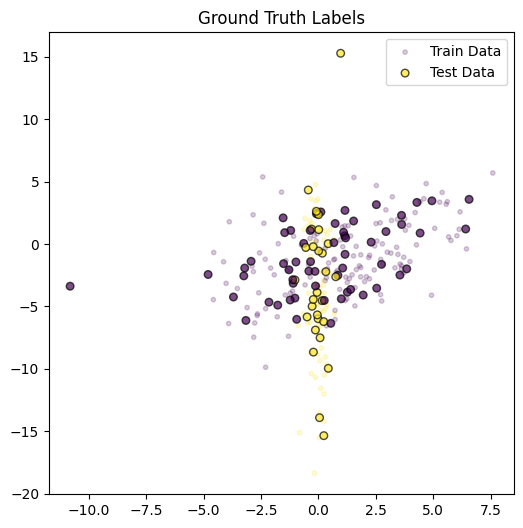

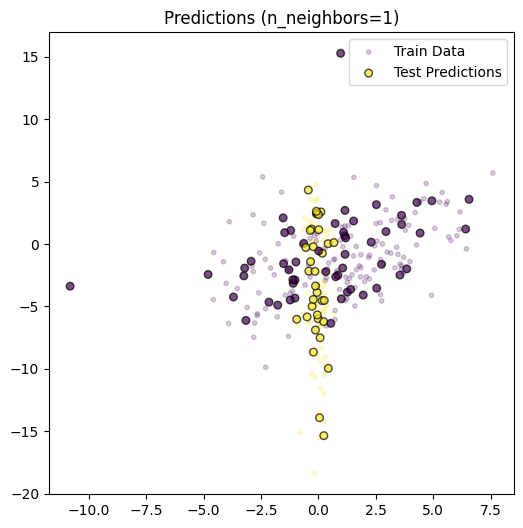

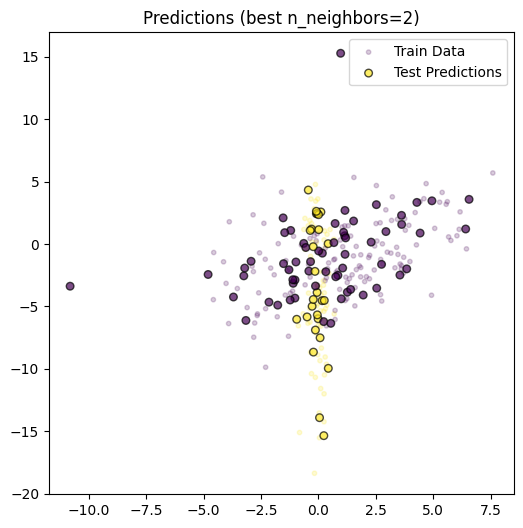

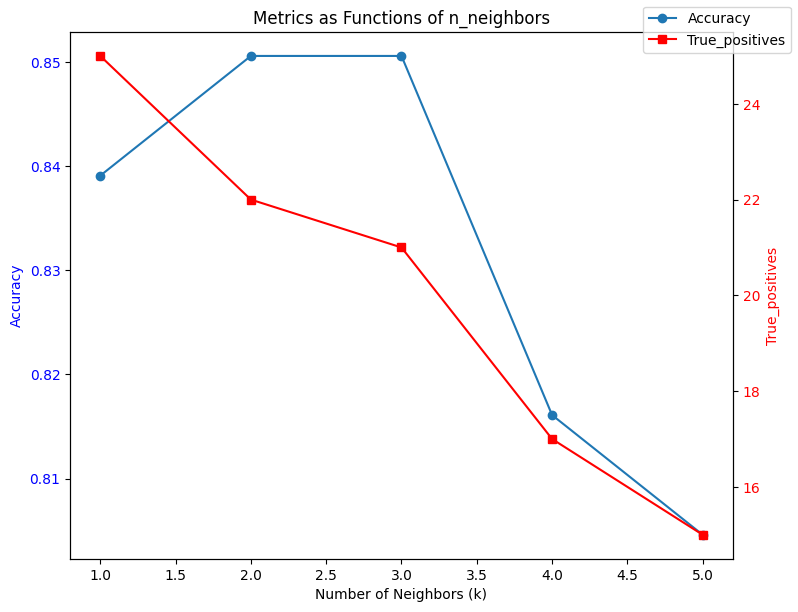

In [61]:
# X_train, y_train = data[indices][:train_size], labels[indices][:train_size]
# X_test, y_test = data[indices][train_size:], labels[indices][train_size:]
# predictor = KNN(n_neighbors=3)
# predictor.fit(X_train, y_train)
# y_pred = predictor.predict(X_test)

plt.figure(figsize=(6, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', alpha=0.2, marker='o', s=10, label='Train Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolor='k', alpha=0.7, s=30, label='Test Data')
plt.title('Ground Truth Labels')
plt.legend()
plt.savefig('ground_truth_labels_transparent.png')
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', alpha=0.2, marker='o', s=10, label='Train Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_1, cmap='viridis', edgecolor='k', alpha=0.7, s=30, label='Test Predictions')
plt.title('Predictions (n_neighbors=1)')
plt.legend()
plt.savefig('predictions_n_neighbors_1_transparent.png')
plt.show()

best_n_neighbors = 1
True_positives = []
accuracies = []
knn_models = []

for n in range(1, 6):
    knn = KNN(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    True_positives.append(metric(y_test, y_pred))
    if acc > accuracies[best_n_neighbors - 1]:
        best_n_neighbors = n
    knn_models.append(knn)

knn_best = knn_models[best_n_neighbors - 1]
y_pred_best = knn_best.predict(X_test)

plt.figure(figsize=(6, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis', alpha=0.2, marker='o', s=10, label='Train Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_best, cmap='viridis', edgecolor='k', alpha=0.7, s=30, label='Test Predictions')
plt.title(f'Predictions (best n_neighbors={best_n_neighbors})')
plt.legend()
plt.savefig('predictions_best_n_neighbors_transparent.png')
plt.show()


fig, ax1 = plt.subplots(figsize=(8, 6))

ax1.plot(range(1, 6), accuracies, label='Accuracy', marker='o')
ax1.set_xlabel('Number of Neighbors (k)')
ax1.set_ylabel('Accuracy', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(range(1, 6), True_positives, label='True_positives', color='r', marker='s')
ax2.set_ylabel('True_positives', color='r')
ax2.tick_params(axis='y', labelcolor='r')

fig.tight_layout()
plt.title('Metrics as Functions of n_neighbors')
plt.savefig('metrics_vs_neighbors.png')
fig.legend()
plt.show()